<a href="https://colab.research.google.com/github/HyeJin816/ESAA_22/blob/main/0530_3_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로 03. Keras**

# **01 딥러닝 준비**

## **1-1. 주요 용어**

#### **1-1-1. 하이퍼 파라미터**
: 사용자가 직접 설정해주는 설정 값 - 하이퍼 파라미터 값 조절 : *튜닝*

#### **1-1-2. 과소적합vs과대적합**

* 과소적합 : 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어짐.  
* 과대적합 : 학습 데이터를 지나치게 반복 학습하여 과하게 적합. 불필요한 노이즈까지 과도하게 반영되어 예측성능은 좋지만 오차 발생

#### **1-1-3. 에포크**

: 딥러닝 모델이 반복 훈련할 때 데이터셋을 전부 학습에 사용하는 1회 훈련 루프

#### **1-1-4 손실함수**

: 예측 값과 정답 값의 차이 또는 오차

In [ ]:
import tensorflow as tf

tf.keras.losses.BinaryCrossentropy()

tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy>

#### **1-1-5. 경사하강법**

: 모델 내부의 가중치에 대한 미분값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록

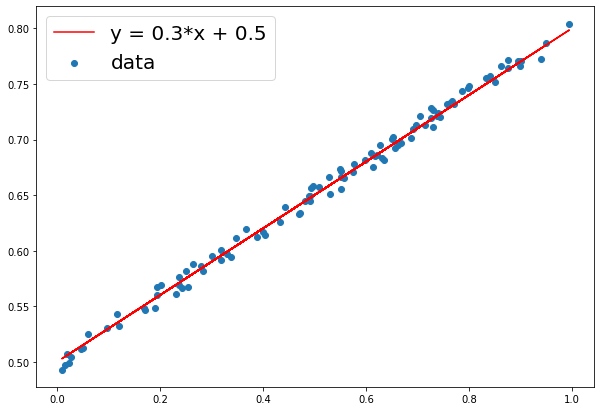

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) 
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.55611, b = 0.42010 error = 1.40113
 5 w = 0.50343, b = 0.39186 error = 0.14667
10 w = 0.47788, b = 0.40522 error = 0.11192
15 w = 0.45572, b = 0.41712 error = 0.08552
20 w = 0.43640, b = 0.42749 error = 0.06544
25 w = 0.41954, b = 0.43654 error = 0.05017
30 w = 0.40484, b = 0.44444 error = 0.03855
35 w = 0.39202, b = 0.45132 error = 0.02971
40 w = 0.38084, b = 0.45732 error = 0.02298
45 w = 0.37109, b = 0.46256 error = 0.01787
50 w = 0.36258, b = 0.46713 error = 0.01398
55 w = 0.35516, b = 0.47111 error = 0.01102
60 w = 0.34869, b = 0.47459 error = 0.00877
65 w = 0.34305, b = 0.47762 error = 0.00705
70 w = 0.33812, b = 0.48026 error = 0.00575
------------------------------------------------------------
74 w = 0.3, b = 0.5 error = 0.00494


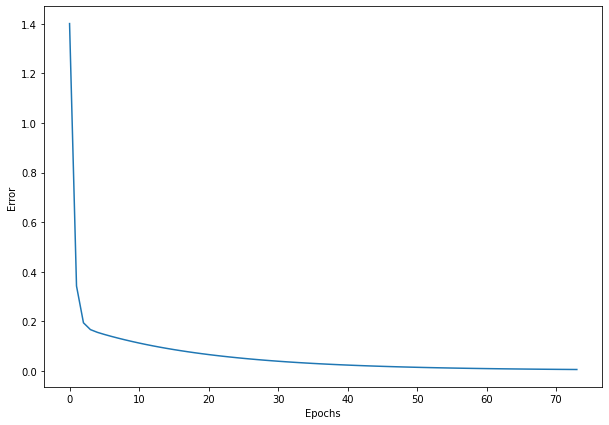

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## **1-2. 딥러닝 프로세스**

#### **1-2-1. 데이터 전처리**
: 데이터를 모델에 주입하기 전 데이터를 가공하는 단계

#### **1-2-2 모델 생성**
모델의 구조를 정의하고 생성하는 단계

#### **1-2-3 모델 컴파일**
```compile()``` 함수로 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표(metrics) 등 정의

#### **1-2-4 모델 훈련**
```fit()``` 함수에 모델 훈련에 필요한  훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 매개변수로 전달

### **1-2-5 모델 검증**
모델을 훈련할 때 사용하지 않은 검증 데이터 셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산. 검증 결과를 토대로 모델 성능 평가

#### **1-2-6 모델 예측**
훈련과 검증이 완료된 모델로 테스트셋을 예측하고 그 결과를 반환

# **02 단순 신경망 훈련**

### **2-1. 선형회귀**

**회귀분석** : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정

### **2-2. 뉴런(Neuron)**

: 인공 신경망 모델을 구성하는 하나의 신경
> 신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성

### **2-3. Dense 레이어**

: 심층신경망 모델을 구성하는 가장 기본 레이어
> Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정 가능

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### **2-4. 데이터셋 만들기**

In [6]:
import numpy as np

x = np.arange(1, 6)

y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


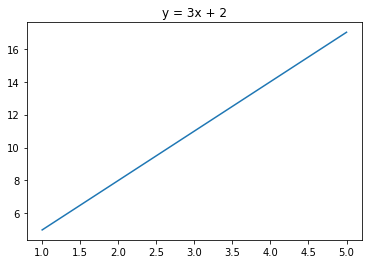

In [7]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### **2-5. Sequential API**

: 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
> 장점 : keras 모델 생성/훈련에서 가장 간단한 방법  
> 단점 : 다중입력이나 다중출력 등의 복잡한 구조 구현 불가

In [8]:
### 모델 구조 (Sequantial API 모델 생성) ###

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [9]:
### 입력 데이터 형태 ###

import tensorflow as tf
model = tf.keras.Sequential([
        # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
        tf.keras.layers.Dense(10, input_shape=[4]), # input_shape=(4,)도 가능
        tf.keras.layers.Dense(5), 
        tf.keras.layers.Dense(1), 
])

In [10]:
### 단순선형회귀모델 정의 ###

model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1]) # 입력 데이터는 x 값을 나타내는 입력 변수 1개만 존재                   
])

### **2-6. 모델 요약**

```model.summary()``` : 모델 구조, 층별 노드 개수, 훈련 시 업데이트할 파라미터 개수 확인 가능  
> *Trainable params*: 모델 훈련 시 업데이트할 파라미터의 총 개수(단순선형회귀에서는 가중치 w, 편향 b로 2개)  
> *Non-trainable params*: 훈련시 업데이트하지 않을 파라미터의 총 개수

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### **2-7. 컴파일**

옵티마이저, 손실함수, 평가지표를 지정
> * 클래스 인스턴스 : 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정  
> * 함수   
> * 사전 정의된 문자열 : 기본값으로 설정된 > 하이퍼파라미터 사용 

In [12]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### **2-8. 훈련**

가중치 텐서 업데이트 : 생성한 모델 인스턴스에 ```fit(x,y,epoch)```  적용

In [13]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [14]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 485ms/step - loss: 137.9474 - mae: 10.9594
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 80.4775 - mae: 8.4092
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 46.9864 - mae: 6.4622
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 27.4688 - mae: 4.9758
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 16.0943 - mae: 3.8409


5 epoch의 훈련 >>> 손실함수는 16.0943, 평균절대오차는 3.8409

In [16]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])                    
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=100) # epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장

Epoch 1/100
1/1 [==============================] - 0s 231ms/step - loss: 63.8190 - mae: 7.5484
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 37.3332 - mae: 5.8168
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 21.8976 - mae: 4.4947
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9016 - mae: 3.4853
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6582 - mae: 2.7145
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 4.6016 - mae: 2.1260
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 2.8195 - mae: 1.6765
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.7800 - mae: 1.3332
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1734 - mae: 1.0709
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8189 - mae: 0.8705
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0

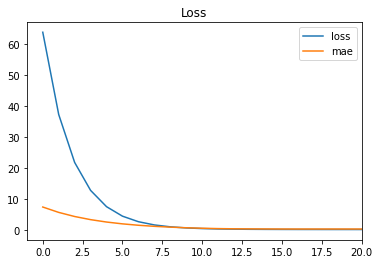

In [17]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

### **2-9. 검증**

In [18]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 163ms/step - loss: 0.1765 - mae: 0.3606


[0.1765190064907074, 0.3606169819831848]

### **2-10. 예측**

In [19]:
# 예측
model.predict([10])

array([[33.742905]], dtype=float32)

# **03 심층 신경망으로 이미지 분류**

### **3-1. 케라스 내장 데이터셋 로드**

In [20]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [21]:
# load_data()로 데이터셋 로드
# 훈련 셋과 검증 셋을 튜플 형태로 정의
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [22]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


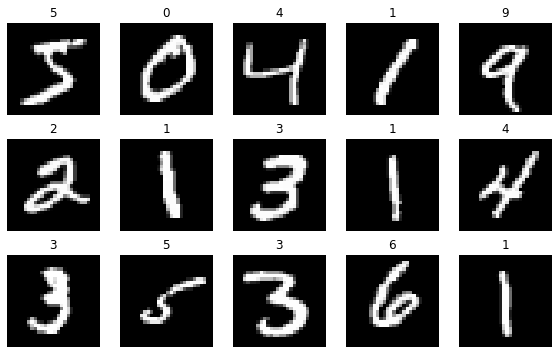

In [23]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### **3-2. 데이터 전처리**

In [24]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [25]:
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [26]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### **3-3. Flatten 레이어**

: 정규화 과정 이후에도 원본 배열 형태 유지 / 개별 데이터 값의 범위는 축소

In [27]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [28]:
print(f'변경전 shape: {x_train.shape}')

#Flatten 레이어 적용
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### **3-4. 활성화 함수**

: 입력을 비선형 출력으로 변환

In [29]:
tf.keras.layers.Dense(128, activation='relu')

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

### **3-5. 입력과 출력**

In [31]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)), # x_train shape : (60000, 28, 28)
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(32, activation='relu'), 
        # 노드=10개(클래스 개수와 동일) # mnist는 0~9까지 총 10개의 클래스로 구성
        tf.keras.layers.Dense(10, activation='softmax'), 
])

**다중 분류** : 출력층의 노드 개수가 2개 이상  
> softmax 활성화 함수  

**이진 분류** : 출력층 노드 개수를 1개로 설정  
> sigmoid 활성화 함수


In [32]:
tf.keras.layers.Dense(1, activation='sigmoid')

tf.keras.layers.Dense(10, activation='softmax')

### **3-6. 손실함수**

In [33]:
### 이진 분류
model.compile(loss='binary_crossentropy')

In [34]:
### 다중 분류

model.compile(loss='categorical_crossentropy')

model.compile(loss='sparse_categorical_crossentropy')

### **3-7. 옵티마이저**

: 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용

In [35]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### **3-8 평가지표**

In [36]:
### 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [37]:
### 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### **3-9 훈련**

In [38]:
# 훈련
model.fit(x_train, y_train, 
          # 검증 셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2286 - accuracy: 0.9319 - val_loss: 18.9466 - val_accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0926 - accuracy: 0.9711 - val_loss: 14.7069 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9797 - val_loss: 15.6514 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 14.0870 - val_accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 20.4101 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 18.1750 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 21.4754 - val_ac

### **3-10 평가**

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 21.6340 - accuracy: 0.9762
검증 셋 정확도: 0.9761999845504761


#### **3-11 예측**

In [40]:
predictions = model.predict(x_test)

predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [41]:
import numpy as np

print(np.argmax(predictions[0]))

print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


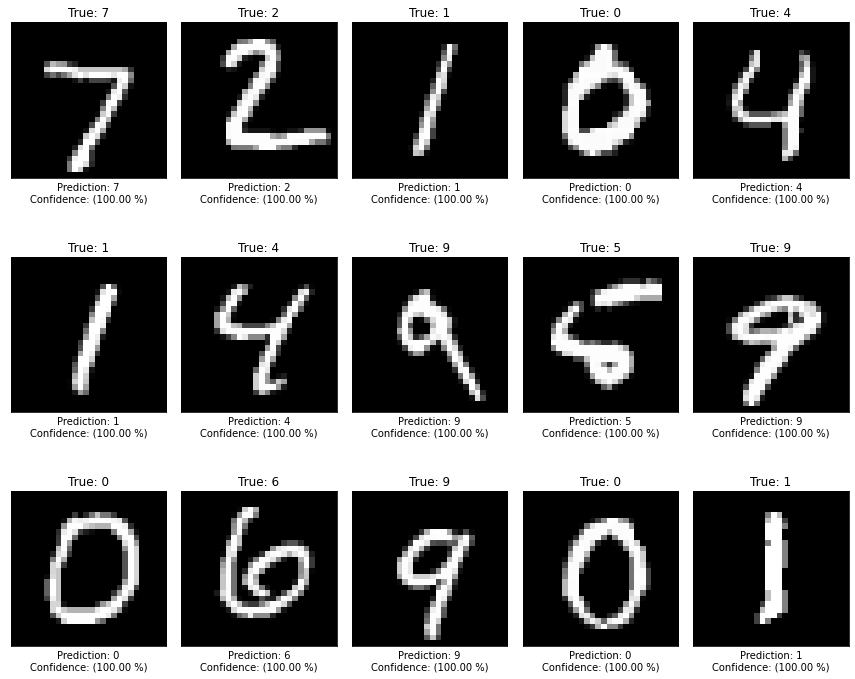

In [42]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()

## **04 모델 세부 설정**

In [43]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


#### **4-1. 초기값 설정**

In [44]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [45]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


#### **4-2. 규제(Regularization)**

In [46]:
#기본값 확인
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_25',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [47]:
#L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


#### **4-3. 드롭아웃(Dropout)**

In [48]:
# 25%의 노드 삭제
tf.keras.layers.Dropout(0.25)

#### **4-4. 배치 정규화(Batch Normalization)**

In [49]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

#### **4-5. 활성화 함수**

In [51]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [52]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                     

In [53]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2941 - accuracy: 0.9151 - val_loss: 0.1657 - val_accuracy: 0.9504
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1384 - accuracy: 0.9586 - val_loss: 0.1159 - val_accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1023 - accuracy: 0.9685 - val_loss: 0.1149 - val_accuracy: 0.9650
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0799 - accuracy: 0.9749 - val_loss: 0.0965 - val_accuracy: 0.9713
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663 - accuracy: 0.9796 - val_loss: 0.0973 - val_accuracy: 0.9697
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0834 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0848 - val_accuracy:

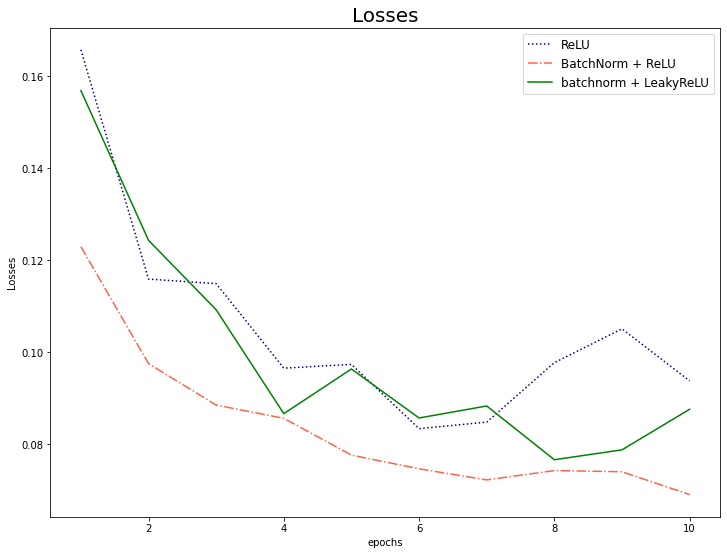

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()